In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [4]:
df = pd.read_csv('wine-clustering.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [5]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [6]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
from scipy import stats
import statistics as st

dict_measures = {}
for name_of_columns in df.columns:
    dict_measures[name_of_columns] = [st.mean(df[name_of_columns]), st.mode(df[name_of_columns]), st.median(df[name_of_columns]),
                                     df[name_of_columns].max()-df[name_of_columns].min(), st.variance(df[name_of_columns]), (st.variance(df[name_of_columns]))**(1/2),
                                     sum(abs(df[name_of_columns] - st.median(df[name_of_columns]))**2)/(len(df[name_of_columns])), stats.iqr(df[name_of_columns], interpolation = 'midpoint' )]
df_statistics = pd.DataFrame(dict_measures, index=['среднее', 'мода', 'медиана', 'разброс', 'несмещенная дисперсия', 'среднеквадратичное отклонение', 'MAD', 'Межквартильный размах'])
df_statistics

Alcohol  Malic_Acid       Ash  Ash_Alcanity  \
среднее                        13.000618    2.336348  2.366517     19.494944   
мода                           13.050000    1.730000  2.300000     20.000000   
медиана                        13.050000    1.865000  2.360000     19.500000   
разброс                         3.800000    5.060000  1.870000     19.400000   
несмещенная дисперсия           0.659062    1.248015  0.075265     11.152686   
среднеквадратичное отклонение   0.811827    1.117146  0.274344      3.339564   
MAD                             0.657798    1.463173  0.074884     11.090056   
Межквартильный размах           1.310000    1.460000  0.345000      4.300000   

                                Magnesium  Total_Phenols  Flavanoids  \
среднее                         99.741573       2.295112    2.029270   
мода                            88.000000       2.200000    2.650000   
медиана                         98.000000       2.355000    2.135000   
разброс                         92.000000       2.900000    4.740000   
несмещенная дисперсия          203.989335       0.391690    0.997719   
среднеквадратичное отклонение   14.282484       0.625851    0.998859   
MAD                            205.876404       0.393076    1.003292   
Межквартильный размах           19.000000       1.055000    1.660000   

                               Nonflavanoid_Phenols  Proanthocyanins  \
среднее                                    0.361854         1.590899   
мода                                       0.260000         1.350000   
медиана                                    0.340000         1.555000   
разброс                                    0.530000         3.170000   
несмещенная дисперсия                      0.015489         0.327595   
среднеквадратичное отклонение              0.124453         0.572359   
MAD                                        0.015879         0.327043   
Межквартильный размах                      0.165000         0.700000   

                               Color_Intensity       Hue     OD280  \
среднее                               5.058090  0.957449  2.611685   
мода                                  3.800000  1.040000  2.870000   
медиана                               4.690000  0.965000  2.780000   
разброс                              11.720000  1.230000  2.730000   
несмещенная дисперсия                 5.374449  0.052245  0.504086   
среднеквадратичное отклонение         2.318286  0.228572  0.709990   
MAD                                   5.479746  0.052008  0.529584   
Межквартильный размах                 2.970000  0.335000  1.225000   

                                     Proline  
среднее                           746.893258  
мода                              680.000000  
медиана                           673.500000  
разброс                          1402.000000  
несмещенная дисперсия           99166.717355  
среднеквадратичное отклонение     314.907474  
MAD                            103996.171348  
Межквартильный размах             484.000000

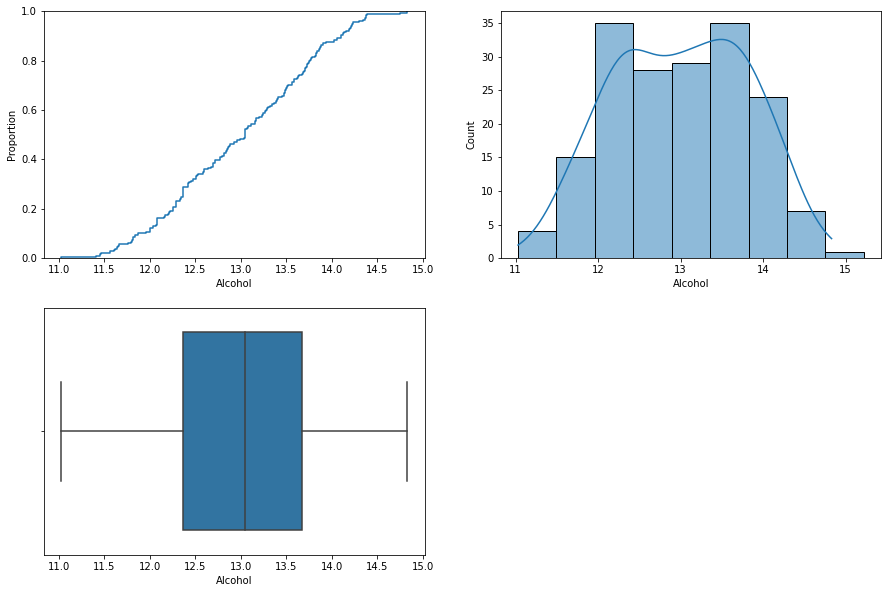

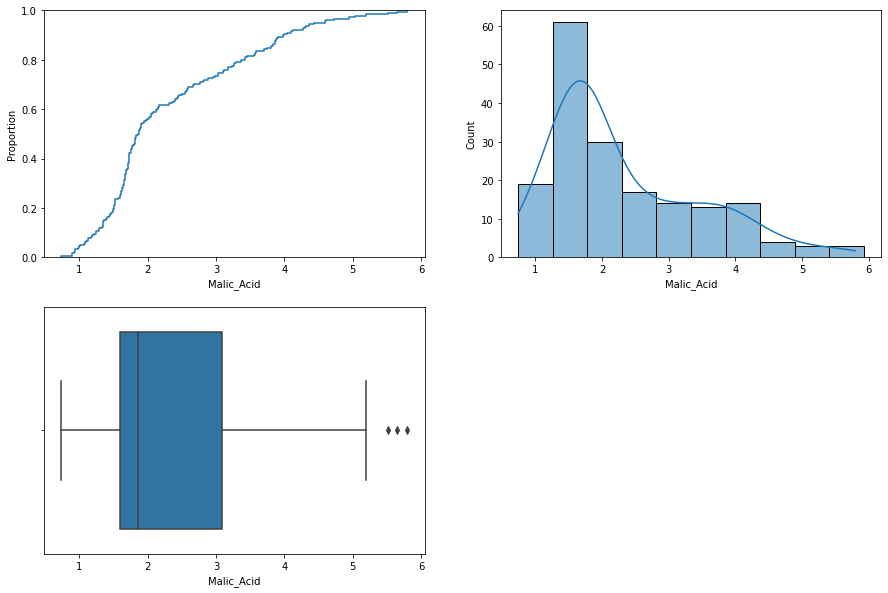

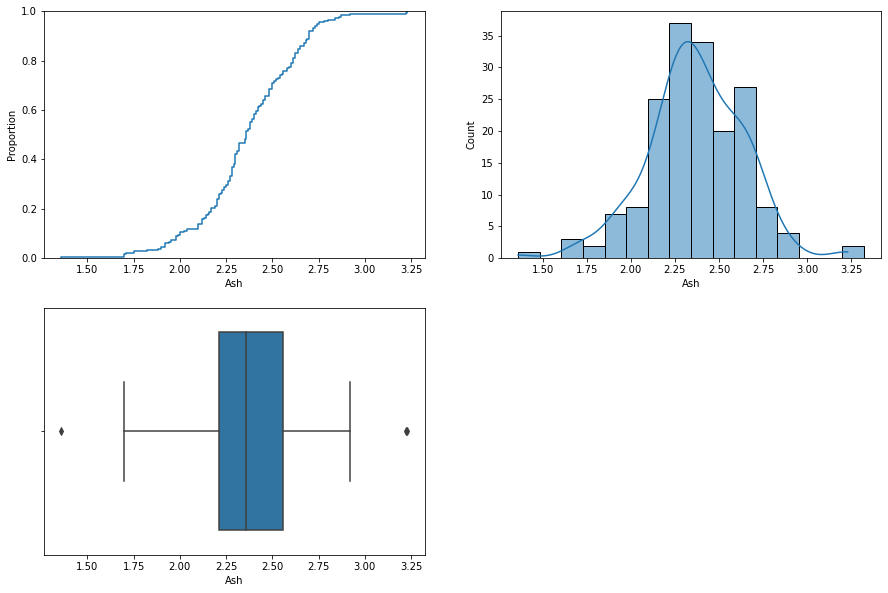

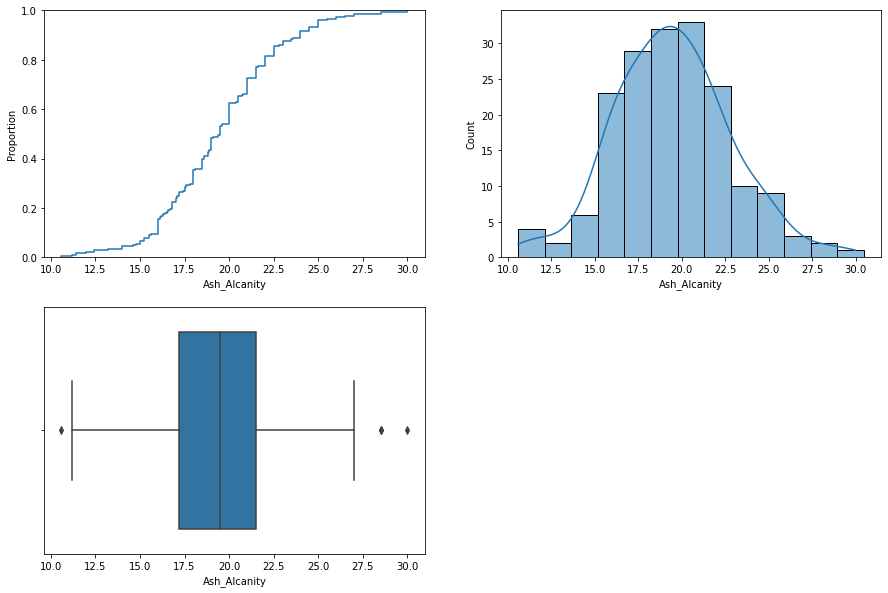

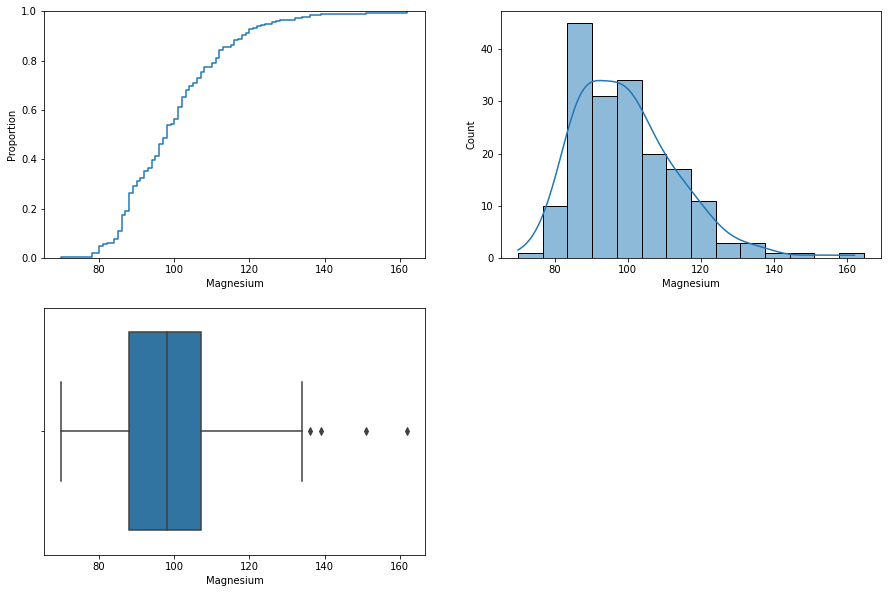

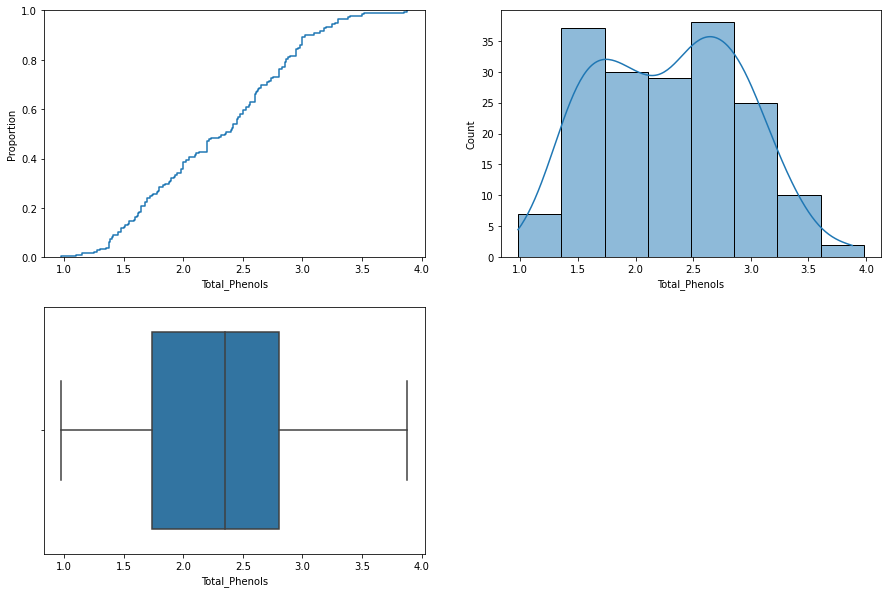

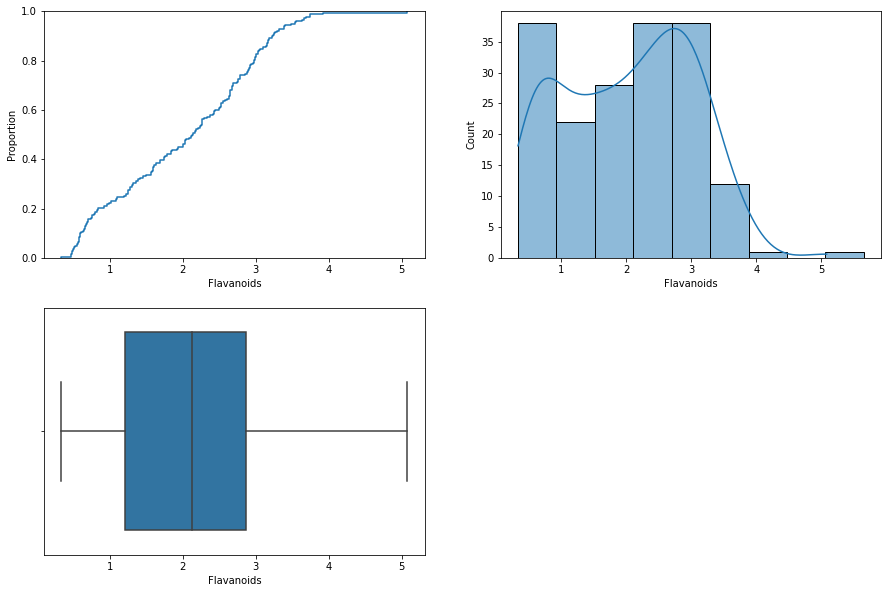

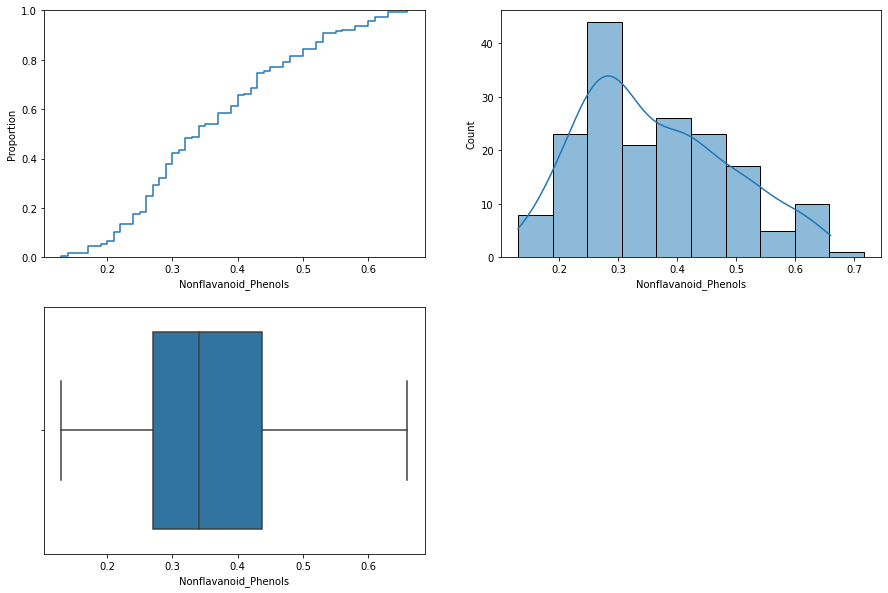

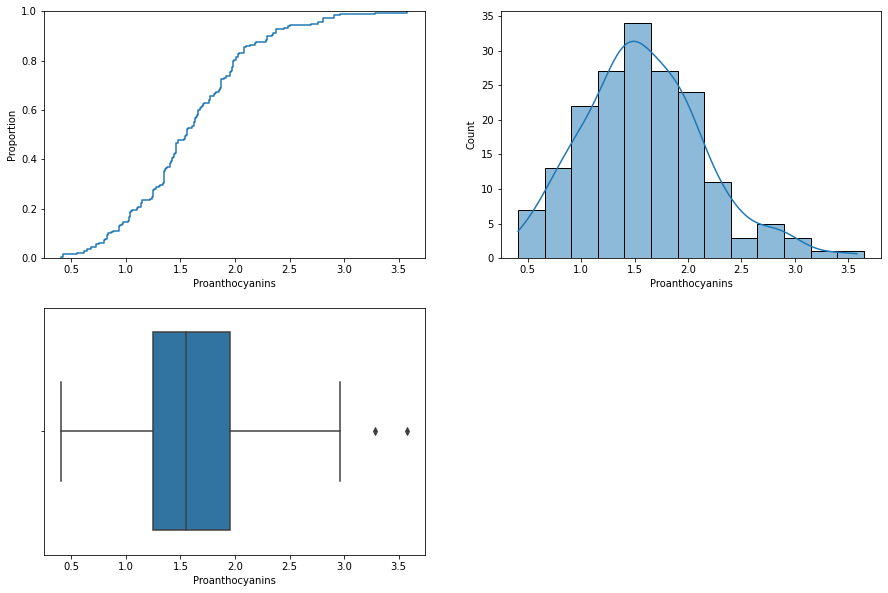

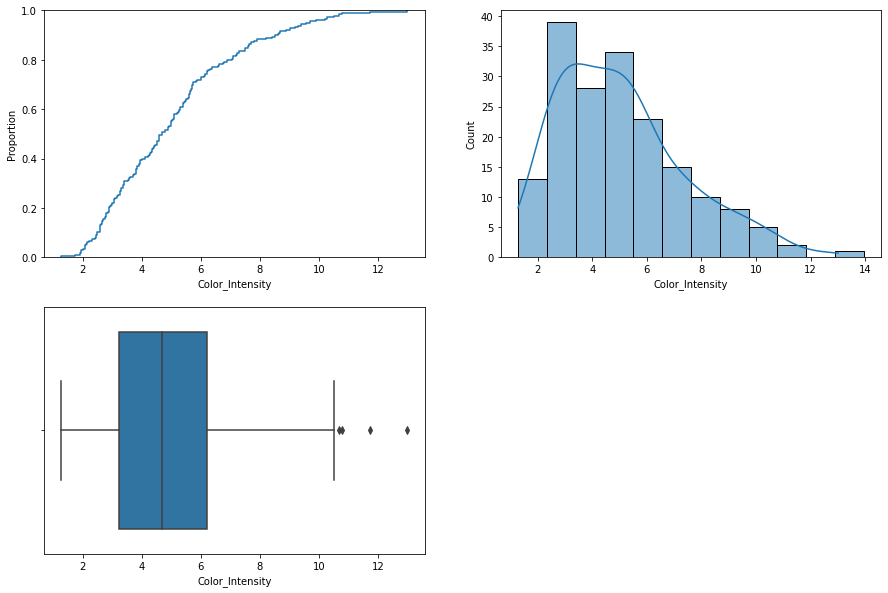

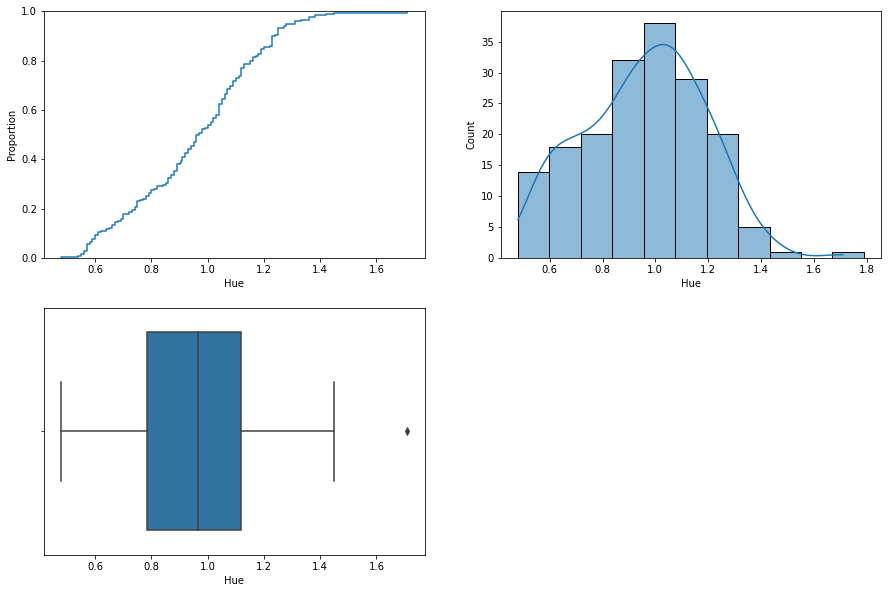

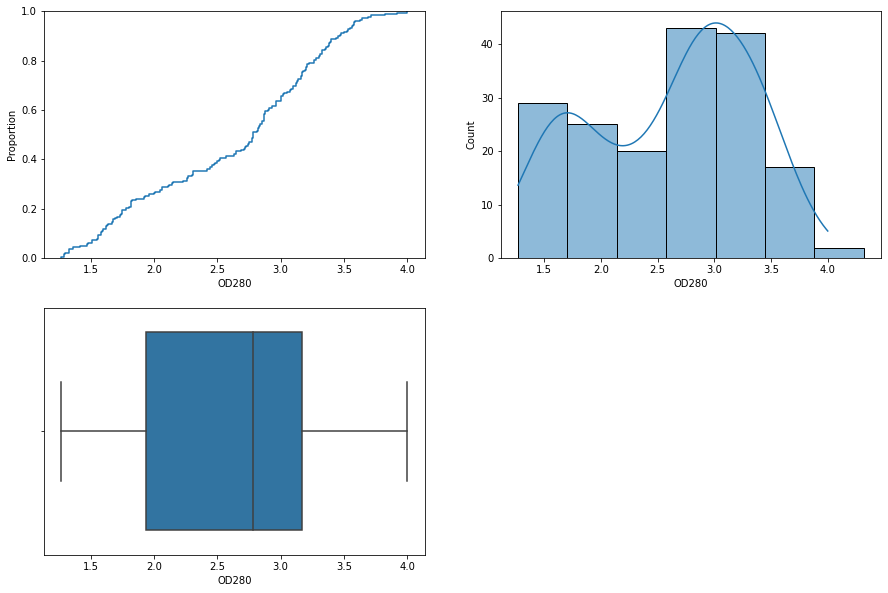

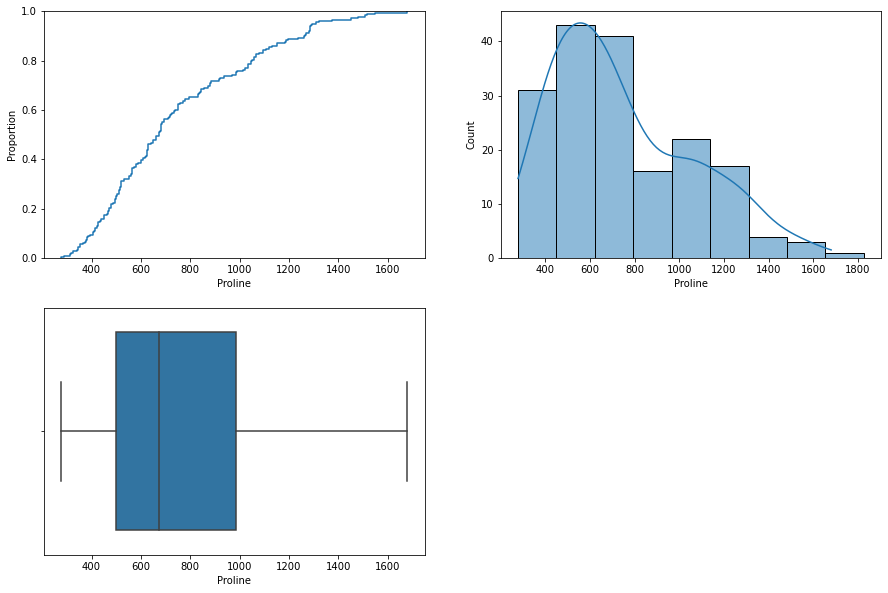

In [9]:
# Возьмем межквартильный размах из посчитанных данных
for column in df.columns:
    QRT=df_statistics.loc['Межквартильный размах', column] 
    binwidth=2*QRT/(df.shape[0]**(1/3)) 

    fig=plt.figure(figsize=(15,10))
    ax_1=fig.add_subplot(2, 2, 1) 
    ax_2=fig.add_subplot(2, 2, 2) 
    ax_3=fig.add_subplot(2, 2, 3)

    sns.ecdfplot(x=column, ax=ax_1, data=df[[column]])

    sns.histplot(data=df[[column]], ax=ax_2, binwidth=binwidth, kde=True, x=column)

    sns.boxplot(x=column, ax=ax_3, data=df[[column]])
    plt.show()
 


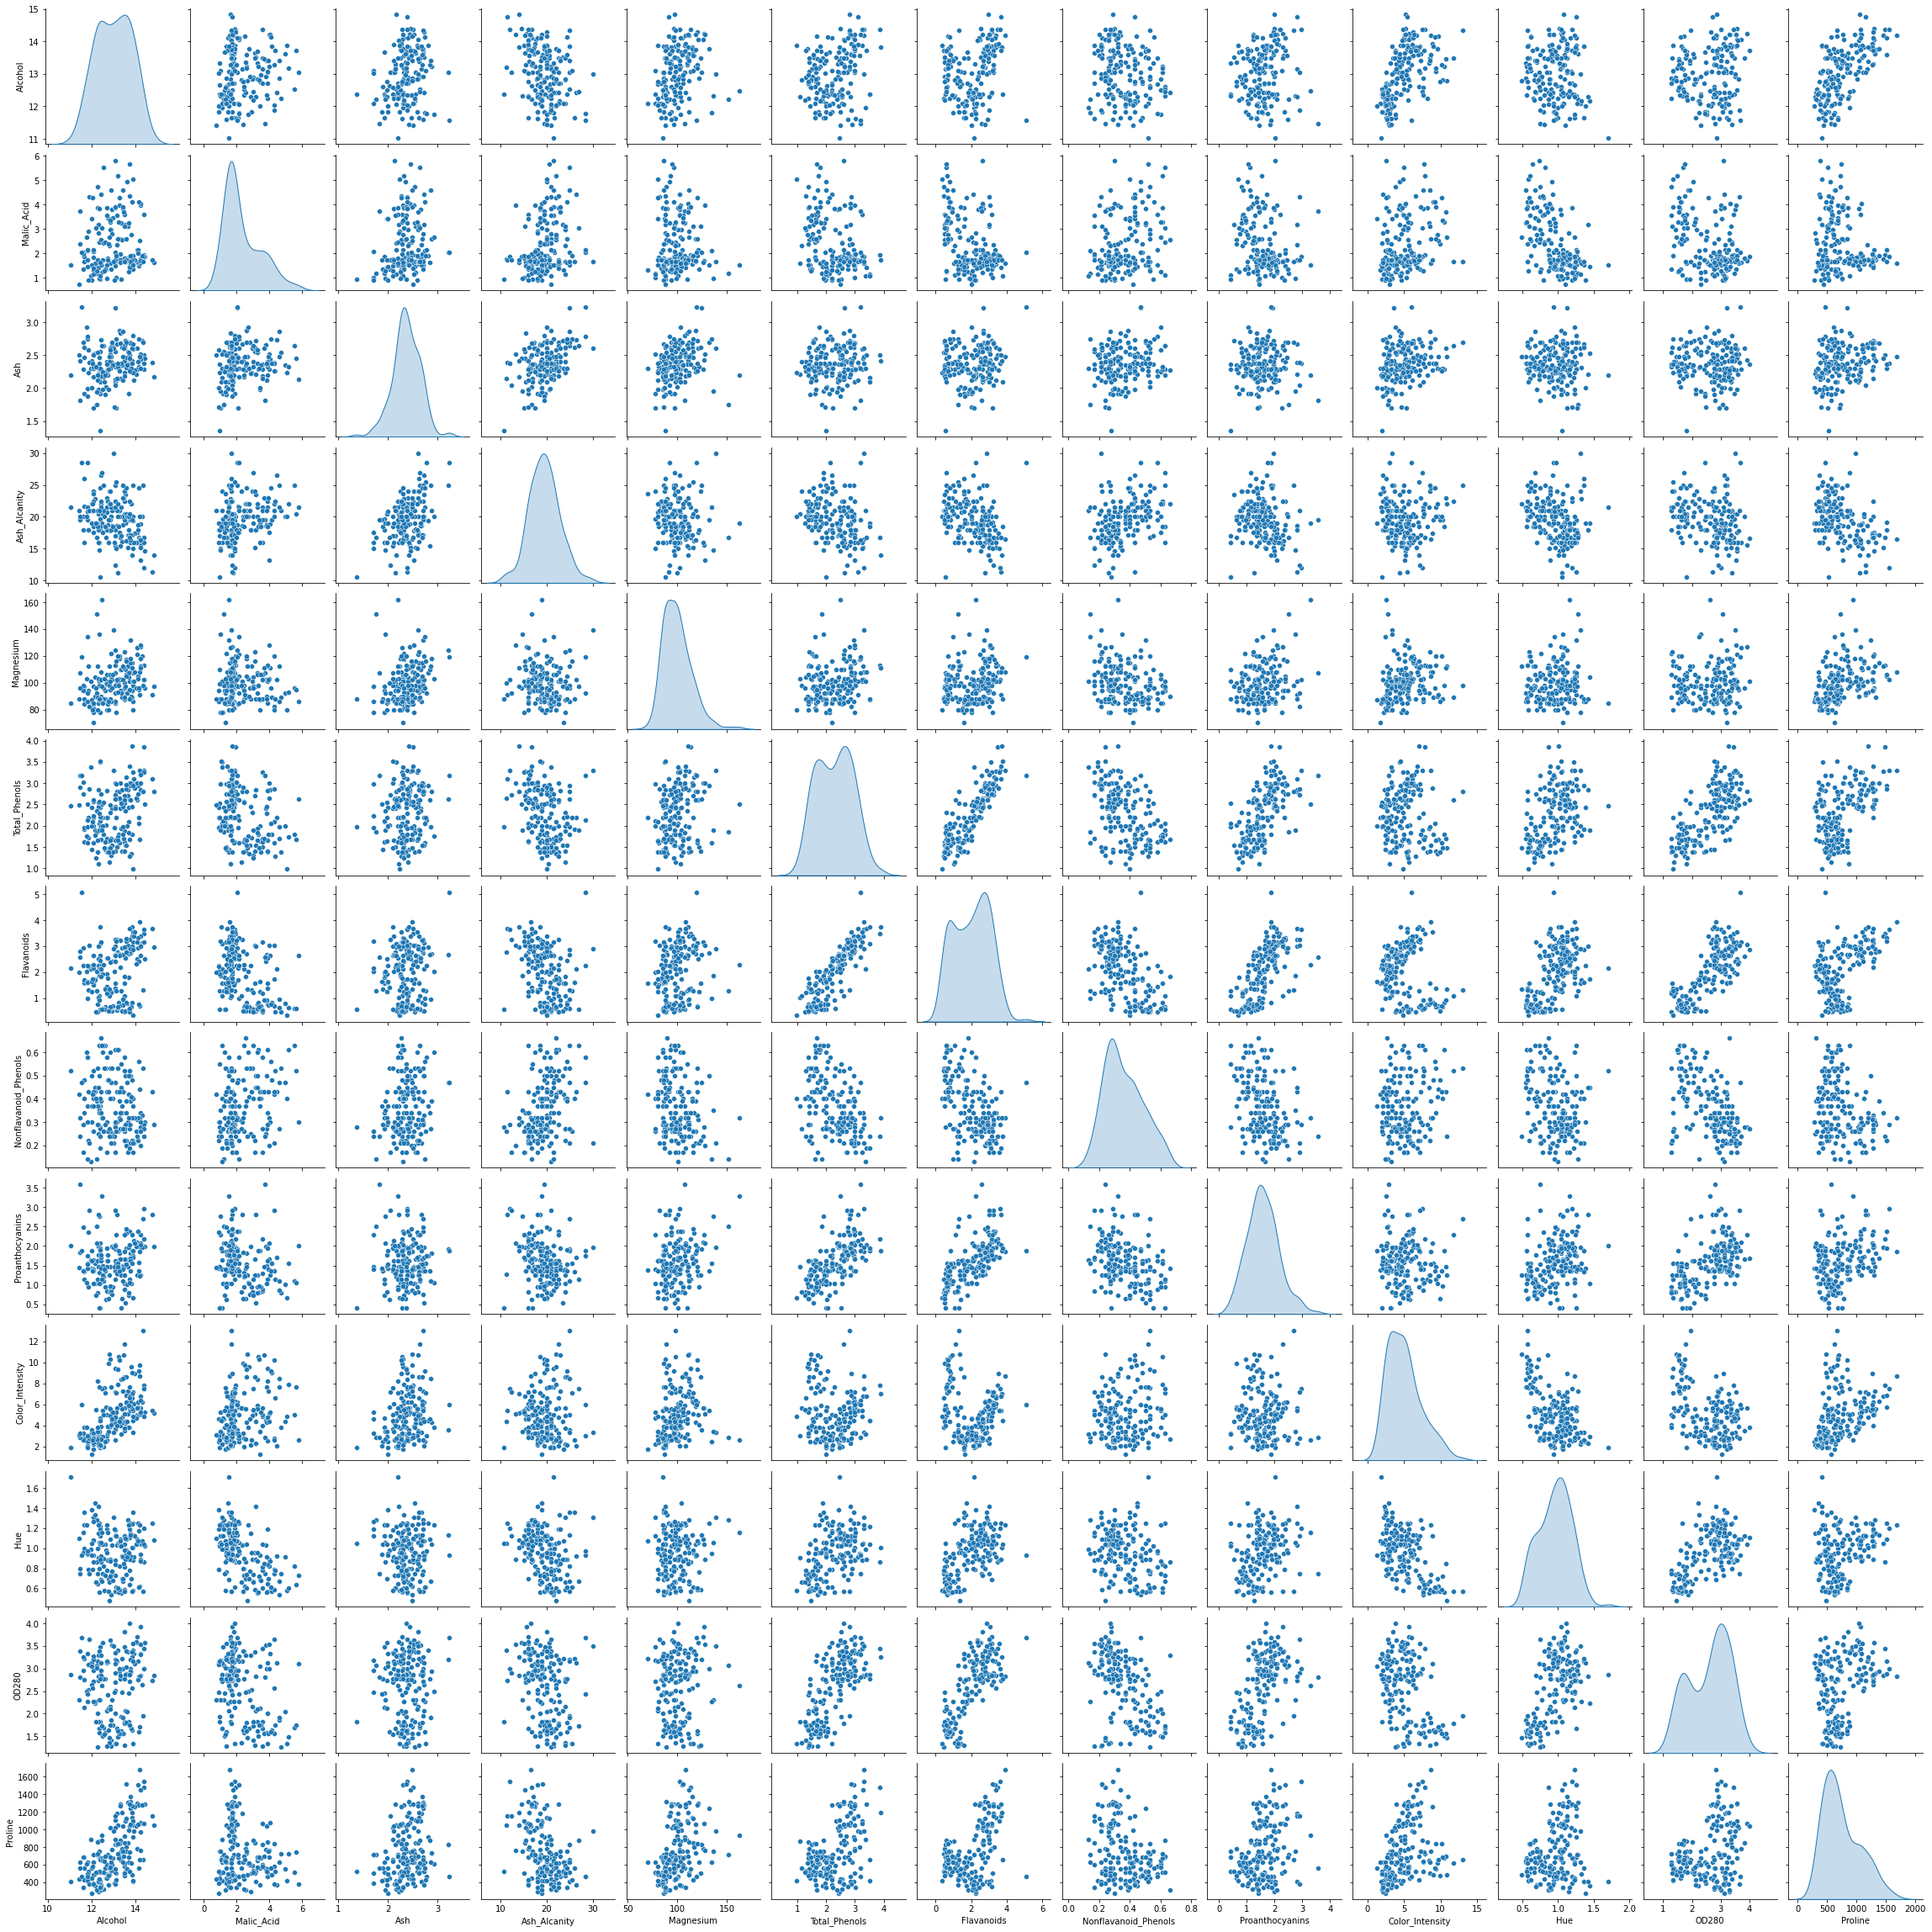

In [10]:
sns.pairplot(df, diag_kind="kde")

In [11]:
scaler = StandardScaler()
scaler_X = scaler.fit_transform(df)

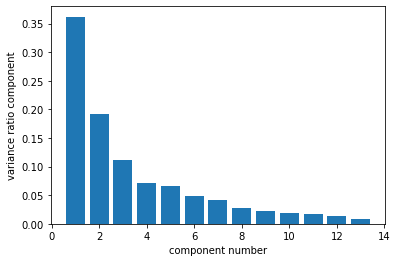

In [90]:
pca = PCA()
pca_X = pca.fit_transform(scaler_X)
pca.explained_variance_ratio_
plt.bar(x=np.arange(1, 14), height=pca.explained_variance_ratio_)
plt.xlabel('component number')
plt.ylabel('variance ratio component')
plt.show()

In [91]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(scaler_X)
pca_X[:,1]

array([-1.44346263,  0.33339289, -1.0311513 , -2.75637191, -0.86983082,
       -2.12240111, -1.17485013, -1.60896307, -0.91807096, -0.78943767,
       -1.30233324, -0.61197723, -0.67570634, -1.13062988, -2.09597558,
       -1.66255173, -2.32730534, -1.63136888, -2.51834367, -1.06113799,
       -0.78689711, -0.24174355,  0.09184062,  0.51627893,  0.31714893,
       -0.94066734, -0.68617513,  0.08980704, -0.68956962, -0.19146194,
       -1.24083383, -1.47187365, -0.05270445, -1.63306043, -0.69793432,
       -0.17671095, -0.65863985, -0.11410976,  0.76943201, -1.80300198,
       -0.7796163 , -0.16996094, -1.15591896, -0.33074213,  0.07100892,
       -1.77710739, -1.19133469, -0.6462586 , -1.24702946, -1.75196741,
       -0.16699199, -0.7452788 , -1.61273386, -1.875168  , -1.01675154,
       -1.32900831, -1.43654878, -1.21219984, -1.73157912,  3.07348616,
        1.38144351,  0.82998412,  1.26278614,  1.9250326 ,  1.90805881,
        0.76391147,  1.88459248,  2.42714611,  0.22051399,  1.40

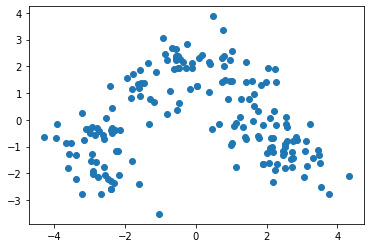

In [92]:
plt.scatter(pca_X[:,0], pca_X[:,1])

In [28]:
df_corr = df.corr()

In [37]:
threshold = 0.85
# [(i, j) for i,j in zip(*np.where(np.abs(df_corr.values) > threshold)) if i!=j]
[f"{df_corr.columns[i]} and {df_corr.columns[j]}" for i, j in zip(*np.where(np.abs(df_corr.values) > threshold)) if i < j]

['Total_Phenols and Flavanoids']

In [48]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

In [95]:
tsne = TSNE(random_state=321, init='pca', metric='cosine')
tsne_representation = tsne.fit_transform(scaler_X)
tsne_representation

C:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


array([[ 12.347434  ,  -3.4807932 ],
       [  7.177848  ,  -8.68974   ],
       [ 11.920407  ,  -7.097429  ],
       [ 11.009522  ,  -4.9074783 ],
       [  6.4107566 ,  -2.1136446 ],
       [ 10.181517  ,  -5.223192  ],
       [  9.275994  ,  -7.6869535 ],
       [  8.378333  ,  -3.8249955 ],
       [ 10.037157  ,  -8.283129  ],
       [ 12.041266  ,  -5.2064962 ],
       [ 10.436124  ,  -6.6397843 ],
       [  8.530524  ,  -8.017785  ],
       [  9.118275  ,  -7.298211  ],
       [ 10.71387   ,  -8.38965   ],
       [ 10.75963   ,  -7.3374557 ],
       [  8.750262  ,  -4.823202  ],
       [  9.298159  ,  -4.006947  ],
       [  9.188332  ,  -3.8710978 ],
       [  9.904153  ,  -5.561891  ],
       [ 11.453217  ,  -2.048228  ],
       [ 12.654232  ,  -3.511052  ],
       [  9.482431  ,  -0.9544144 ],
       [  7.680007  ,  -7.082707  ],
       [  6.6607213 ,  -6.466241  ],
       [  6.248974  ,  -5.7017813 ],
       [  6.2097178 ,  -1.9981573 ],
       [  8.515164  ,  -6.0962834 ],
 

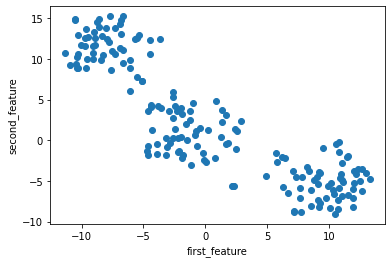

In [99]:
plt.scatter(tsne_representation[:, 0], 
            tsne_representation[:, 1])
plt.xlabel('first_feature')
plt.ylabel('second_feature')
plt.show()

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Значение коэффициента силуэта при разном количестве кластеров: [0.5749462, 0.6493104, 0.5468705, 0.43731698, 0.44843128, 0.45267162, 0.37925947, 0.38349605, 0.3834526, 0.4007329]


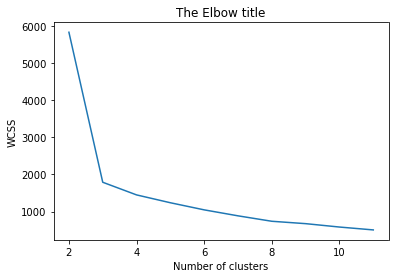

In [115]:
wcss=[]
silhouette_scores_list = []

for i in range(2,12):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(tsne_representation)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    labels = kmeans.labels_
    silhouette_scores_list.append(silhouette_score(tsne_representation, labels))
    
number_clusters = range(2,12)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
print(f'Значение коэффициента силуэта при разном количестве кластеров: {silhouette_scores_list}')

In [136]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(tsne_representation)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


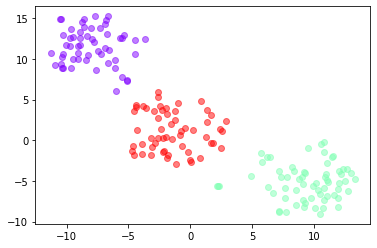

In [150]:
colors = cm.rainbow(np.linspace(0, 1, len(set(kmeans.labels_))))
colors
for y, c in zip(set(kmeans.labels_), colors):
    plt.scatter(tsne_representation[kmeans.labels_==y, 0], 
                tsne_representation[kmeans.labels_==y, 1], 
                c=c, alpha=0.5)